In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

penguins_raw.csv



In [2]:
penguins = pd.read_csv("../data/penguins_raw.csv") # loading dataset

## Data Cleaning

In [3]:
# Removing unecessary columns
penguins.drop('studyName',axis=1,inplace=True)
penguins.drop('Sample Number',axis=1,inplace=True)
penguins.drop('Region',axis=1,inplace=True)
penguins.drop('Island',axis=1,inplace=True)
penguins.drop('Stage',axis=1,inplace=True)
penguins.drop('Individual ID',axis=1,inplace=True)
penguins.drop('Clutch Completion',axis=1,inplace=True)
penguins.drop('Date Egg',axis=1,inplace=True)
penguins.drop('Sex',axis=1,inplace=True)
penguins.drop('Delta 15 N (o/oo)',axis=1,inplace=True)
penguins.drop('Delta 13 C (o/oo)',axis=1,inplace=True)
penguins.drop('Comments',axis=1,inplace=True)

In [4]:
# Remove rows with NaN
penguins.dropna(inplace=True)

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              342 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


In [6]:
# Simplify the Species column
species = penguins['Species']
adelie = species.str.contains("Adelie")
gentoo = species.str.contains("Gentoo")
chinstrap = species.str.contains("Chinstrap")

penguins['Species'] = np.where(adelie, "Adelie", 
                              np.where(gentoo, "Gentoo", 
                                      np.where(chinstrap, "Chinstrap", "-")))

In [7]:
penguins.head(5)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


## Graphs

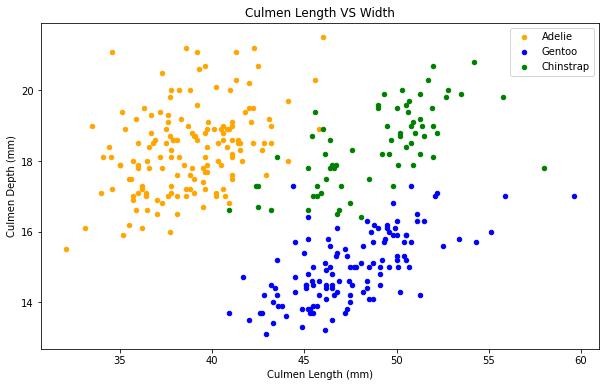

In [8]:
fig = penguins[penguins.Species=='Adelie'].plot(kind='scatter',x='Culmen Length (mm)',y='Culmen Depth (mm)',color='orange', label='Adelie')
penguins[penguins.Species=='Gentoo'].plot(kind='scatter',x='Culmen Length (mm)',y='Culmen Depth (mm)',color='blue', label='Gentoo',ax=fig)
penguins[penguins.Species=='Chinstrap'].plot(kind='scatter',x='Culmen Length (mm)',y='Culmen Depth (mm)',color='green', label='Chinstrap', ax=fig)
fig.set_xlabel("Culmen Length (mm)")
fig.set_ylabel("Culmen Depth (mm)")
fig.set_title("Culmen Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

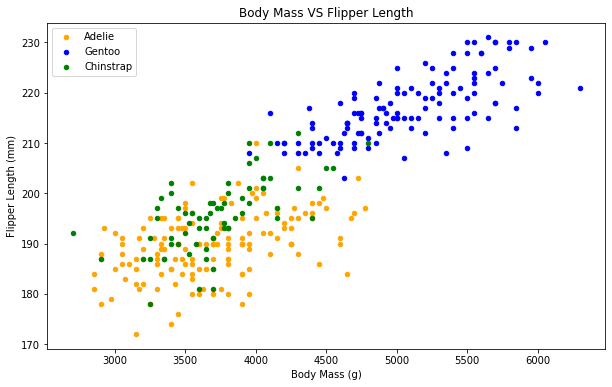

In [9]:
fig = penguins[penguins.Species=='Adelie'].plot(kind='scatter',x='Body Mass (g)',y='Flipper Length (mm)',color='orange', label='Adelie')
penguins[penguins.Species=='Gentoo'].plot(kind='scatter',x='Body Mass (g)',y='Flipper Length (mm)',color='blue', label='Gentoo',ax=fig)
penguins[penguins.Species=='Chinstrap'].plot(kind='scatter',x='Body Mass (g)',y='Flipper Length (mm)',color='green', label='Chinstrap', ax=fig)
fig.set_xlabel("Body Mass (g)")
fig.set_ylabel("Flipper Length (mm)")
fig.set_title("Body Mass VS Flipper Length")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

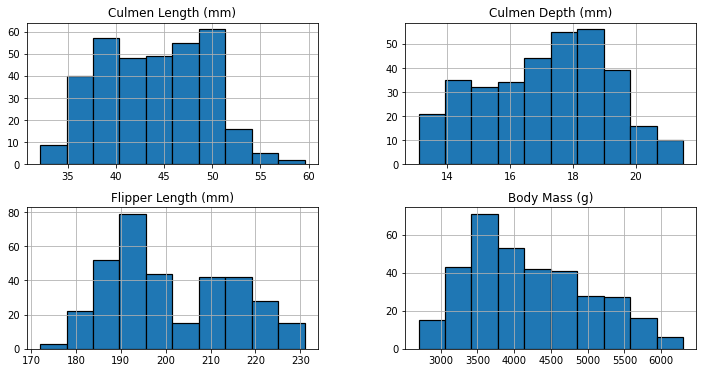

In [10]:
penguins.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

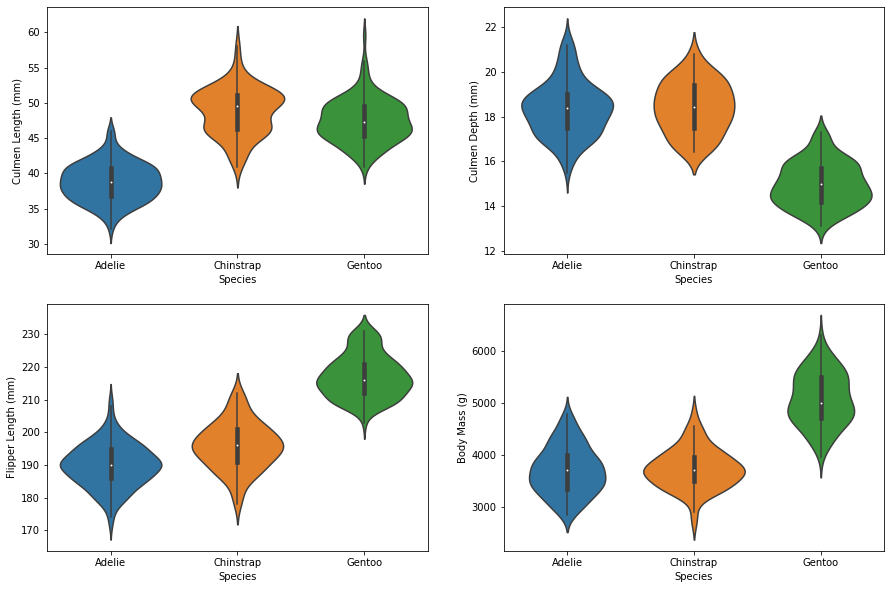

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='Culmen Length (mm)',data=penguins)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='Culmen Depth (mm)',data=penguins)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='Flipper Length (mm)',data=penguins)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='Body Mass (g)',data=penguins)

## Correlation of Data

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [13]:
penguins.shape

(342, 5)

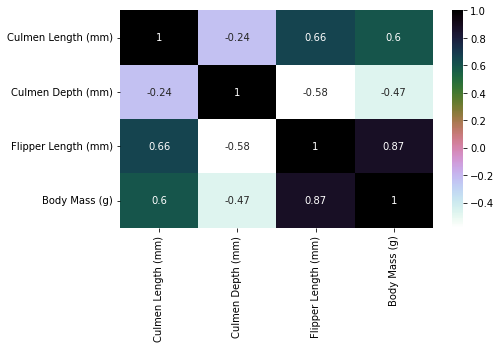

In [14]:
plt.figure(figsize=(7,4)) 
sns.heatmap(penguins.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

### Observation

* Culmen Length and Depth are not correlated
* Flipper Length and Boddy Mass are strongly correlated

## Classification

In [15]:
train, test = train_test_split(penguins, test_size = 0.3)

print(train.shape)
print(test.shape)

(239, 5)
(103, 5)


In [16]:
train_X = train[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
train_y = train.Species

test_X = train[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
test_y = train.Species

In [17]:
train_X.head(2)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
296,47.5,14.2,209.0,4600.0
9,42.0,20.2,190.0,4250.0


In [18]:
train_y.head()

296       Gentoo
9         Adelie
211    Chinstrap
294       Gentoo
105       Adelie
Name: Species, dtype: object

### Support Vector Machine (SVM)

In [19]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.7280334728033473


### Logistic Regression

In [20]:
model = LogisticRegression(max_iter=200)
model.fit(train_X,train_y)
prediction=model.predict(train_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.99581589958159


### Decision Tree

In [21]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 1.0


### K-Nearest Neighbours

Checking accuracy for different values of n

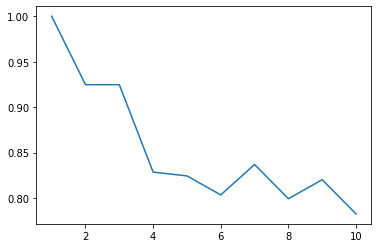

In [22]:
a_index=list(range(1,11))
a=pd.Series([],dtype='float64')
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=pd.concat([a, pd.Series(metrics.accuracy_score(prediction,test_y))], axis='index')
plt.plot(a_index, a)

In [23]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9246861924686193
